#**Spinny's Revenue Growth Through Demand and Pricing Optimisation**
Spinny is an online used-car retailing platform that aims to bring about transparency and convenience in the car buying and selling process in India. Spinny operates across the entire value chain of pre-owned cars, embedding superior technology and processes to deliver a premium experience to customers. It has 36 car hubs that operate across 15 cities.

Spinny wants to increase revenue by boosting the number of completed transactions. To achieve this, it is essential to understand the demand for cars across different regions and identify the most in-demand cars and their attributes. Additionally, determining the right pricing for each car, based on its attributes and market demand, is crucial for staying competitive.

## **Objective:**
In this project our goal is to analyse used car transaction data to increase revenue by boosting the number of completed transactions. Some objectives of the project are:

**Demand Anlysis:**
1. Assess the demand for pre-owned cars in each region and identify geographic patterns to target high-demand markets more effectively.
2. Identify the demand for specific car models and their key attributes (e.g.,
condition, fuel type, mileage).

**Revenue Analysis:**
1. Identify how factors like car age, condition, odometer reading, and title status influence revenue.
2. Identify how revenue varies on basis of region and time.
3. Investigate revenue fluctuations over time and seasonal trends.

**Price Analysis:**
1. Analyse how price are distributed across different key attributes (e.g., condition, transmission etc.)
2. Analyse how price varies by manufacturer and model.
3. Optimizing price for each car.



##**Business Impact:**

This analysis will help **Spinny** to:

**Identify regional demand:**
1. Knowing which regions have maximum and minimum sale can help to formulate sales strategy.
2. It will also help Spinny in inventory management in such regions where demand is high.

**Optimize price:**
1. As per demand patterns Spinny can finalise competitive yet profitable prices for each car.
2. Avoiding underpricing will help to prevent revenue loss, while controlling overpricing will help to reduce unsold inventory.
3. Offering fair and transparent price will help to build trust with customers.

**Formulate marketing strategies:**
1. Targeted promotions of less sold cars by offering discounts and cashbacks.
2. Focused marketing of highly sold cars.
3. Long-term market strategies can be formed on basis of car trends and pricing.





## **Dataset Overview:**

**Dataset Name:** Spinny Analytics Dataset

**Number of Rows:** 426880

**Number of Columns:** 21

**Description:** The dataset contains key metrics about sales of Pre-owned cars at Spinny, providing insights about sales trend and transaction patterns.



### **Data Columns Information:**

**1. id (Transaction ID):** A unique identifier for each car transaction in the dataset.

**2. Price:** The final selling price of the vehicle in Indian Rupees (INR).

**3. Year:** The year of manufacture of the vehicle, indicating its age.

**4. Manufacturer:** The brand or company that produced the vehicle.

**5. Model:** The specific model name of the vehicle produced by the manufacturer.

**6. Condition:** The physical and operational state of the vehicle at the time of sale.

**7. Cylinders:** The number of cylinders in the car's engine, influencing its power and performance.

**8. Fuel:** The type of fuel the vehicle uses, such as petrol, diesel, CNG, or electric.

**9. Odometer:** The total distance the vehicle has traveled, measured in kilometers.

**10. Title_status:** The condition of the car's , indicating if it is clean, or has missing parts or has liens.

**11. Transmission:** The transmission states whether the car is automatic, manual or of other category.

**12. VIN (Vehicle Identification Number):** A unique serial number assigned to each vehicle for identification.

**13. Drive:** The drivetrain configuration of the vehicle (e.g., front-wheel drive, rear-wheel drive).

**14. Size:** The size classification of the vehicle, such as compact, midsize, or full-size.

**15. Type:** The type of vehicle, such as sedan, SUV, hatchback, or truck.

**16. Paint_color:** The exterior color of the vehicle.

**17.Image_url:** A link to an image of the vehicle for reference.

**18. State:** The Indian state where the car transaction took place.

**19. Posting_date:** The date when the car was listed for sale.

**20. Latitude:** The geographical latitude coordinate of the transaction location.

**21. Longitude:** The geographical longitude coordinate of the transaction location.

# **Analysis and Visualization:**

## **1. Impoting important libraries and loading the dataset from google**

In [ ]:
 # Step 1: Install gdown
!pip install gdown

# Step 2: Import necessary libraries
import gdown
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression

# Step 3: Set the file ID and create a download URL
file_id = "1QQaRZizuq3TGhUqHyIc701ChT-GgM1yR"
download_url = f"https://drive.google.com/uc?id={file_id}"

# Step 4: Set the output file name
output_file = "spinny_dataset.csv"

# Step 5: Download the file
gdown.download(download_url, output_file, quiet=False)

# Step 6: Load the CSV file into a Pandas DataFrame
data = pd.read_csv(output_file, encoding = 'unicode_escape') # to avoid encoding error, use 'unicode_escape'

Downloading...
From: https://drive.google.com/uc?id=1QQaRZizuq3TGhUqHyIc701ChT-GgM1yR
To: /content/spinny_dataset.csv
100%|██████████| 99.9M/99.9M [00:00<00:00, 242MB/s]


##**2. Data Understanding**

###**1) Varifying the data has been imported.**



In [ ]:
# Printing first 5 rows of data.

print("\033[1m First 5 Rows of the Dataset are: \033[0m") # \033[1m and \033[0m codes are used to print statement in bold.
data.head()

 First 5 Rows of the Dataset are: 


,id,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,...,VIN,drive,size,type,paint_color,image_url,state,posting_date,latitude,longitude
0,7222695916,770530.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Haryana,NaN,28.84,75.12
1,7218891961,1528210.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Haryana,NaN,27.90,77.04
2,7221797935,2696820.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,West Bengal,NaN,24.68,85.97
3,7222270760,192610.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Andhra Pradesh,NaN,15.52,81.93
4,7210384030,629240.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,West Bengal,NaN,23.78,87.49


###**2) Checking shape of the dataset.**

In [ ]:
# Checking the number of rows and column in dataset using shape function.

print("\033[1mThe Number of Rows and Columns in the dataset are:") # \033[1m and \033[0m codes are used to print statement in bold.
data.shape

The Number of Rows and Columns in the dataset are:


(426880, 21)

###**3) Checking information of the dataset.**


In [ ]:
# checking information of dataset using info() function

print("\033[1m Dataset information:\033[0m\n") # \033[1m and \033[0m codes are used to print statement in bold.
data.info()

 Dataset information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   price         426880 non-null  float64
 2   year          425675 non-null  float64
 3   manufacturer  409234 non-null  object 
 4   model         421603 non-null  object 
 5   condition     252776 non-null  object 
 6   cylinders     249202 non-null  object 
 7   fuel          423867 non-null  object 
 8   odometer      422480 non-null  float64
 9   title_status  418638 non-null  object 
 10  transmission  424324 non-null  object 
 11  VIN           265838 non-null  object 
 12  drive         296313 non-null  object 
 13  size          120519 non-null  object 
 14  type          334022 non-null  object 
 15  paint_color   296677 non-null  object 
 16  image_url     426812 non-null  object 
 17  state         426880 non-

###**4) Displaying the data summary statistics.**

In [ ]:
# Checking summary statistics of the dataset using describe() function.

print("\033[1m Data Summary Statistics: \033[0m\n") # \033[1m and \033[0m codes are used to print statement in bold.
pd.options.display.float_format = '{:.2f}'.format #displaying the result in table format
data.describe()

 Data Summary Statistics: 



,id,price,year,odometer,latitude,longitude
count,426880.00,426880.00,425675.00,422480.00,426880.00,426880.00
mean,7311486634.22,9657028.13,2011.24,98043.33,22.80,79.01
std,4473170.41,1564438931.03,9.45,213881.50,6.53,5.21
min,7207408119.00,0.00,1900.00,0.00,6.80,68.40
25%,7308143339.25,757680.00,2008.00,37704.00,17.80,75.72
50%,7312620821.00,1791970.00,2013.00,85548.00,24.06,77.35
75%,7315253543.50,3401080.00,2017.00,133542.50,28.56,80.93
max,7317101084.00,479893395160.00,2022.00,10000000.00,36.00,97.40


###**5) Calculating the number of missing values in each column of the dataset.**

In [ ]:
# Calculating missing values in each column using isna() function

print("\033[1m Number of missing values in each column of dataset are: \033[0m") # \033[1m and \033[0m codes are used to print statement in bold.
data.isna().sum()

 Number of missing values in each column of dataset are: 


,0
id,0
price,0
year,1205
manufacturer,17646
model,5277
condition,174104
cylinders,177678
fuel,3013
odometer,4400
title_status,8242


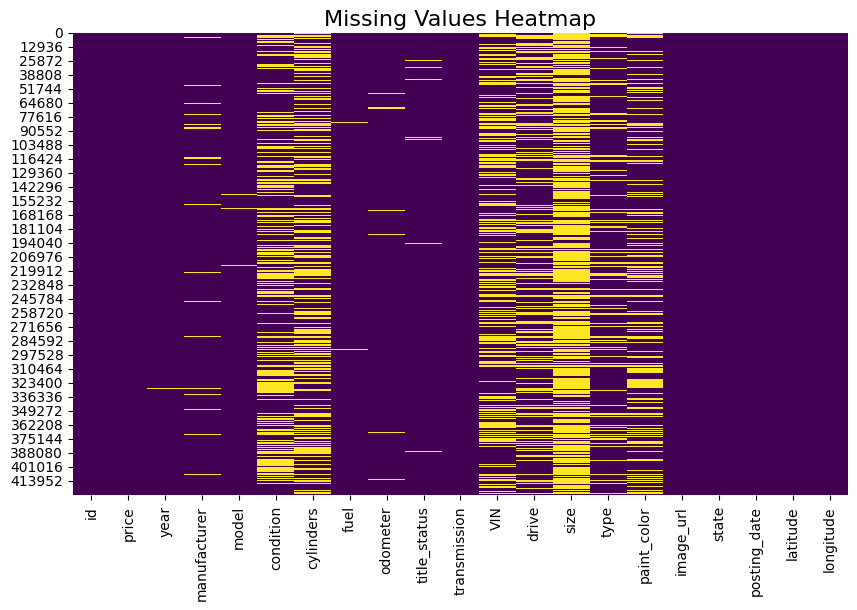

In [ ]:
# Visualizing the missing values on heatmap

fig, ax = plt.subplots(figsize=(10, 6)) # defining figure size
sns.heatmap(data.isnull(), cbar=False, cmap='viridis', ax=ax) # plotting heatmap using seaborn
ax.set_title("Missing Values Heatmap", fontsize=16) # Giving title for the map
plt.show() # showing the map through matplotlib.pyplot

Many columns have missing values, which will be handeled accordingly in data cleaning part.

###**6) Checking duplicate values in dataset.**

In [ ]:
# Checking duplicate values in the dataset

duplicate = data.duplicated().sum() # counting duplicate values
print("\033[1m There are", duplicate, "duplicate values in the dataset. \033[0m") # Printing result in bold letters.

 There are 0 duplicate values in the dataset. 


Since there are no duplicate values in the dataset, we do not need to remove them.

##**3. Data Cleaning and Preparation**

###**1) Converting datatype of 'year' column from float to integer.**

In [ ]:
# converting datatype of year from float to int

data['year'] = pd.to_numeric(data['year'], errors='coerce').astype('Int64') # using errors='coerce' to avoid erroe during conversion
print("\033[1m Datatype of 'year' column changed to:\033[0m\n", data['year'].dtypes) # varifying the changes.

 Datatype of 'year' column changed to:
 Int64


Since the year column has vlaues in float, we converted it to integer to analyse further.

###**2) Converting datatype of 'posting_date' column from object to timestamp.**

In [ ]:
# changing data type of posting_date column to integer

data['posting_date'] = pd.to_datetime(data['posting_date'], errors='coerce') # using errors='coerce' to avoid error dusring conversion
print("\033[1m Datatype of 'posting_date' column changed to:\033[0m\n",data['posting_date'].dtypes) # varying the changes.

 Datatype of 'posting_date' column changed to:
 datetime64[ns, UTC]


Since the datatype of posting_date column was object. We changed it to timestamp to use in further analysis.

###**3) Dropping mising value rows from 'posting_date' column.**

In [ ]:
# dropping missing value rows of posting_date column

data.dropna(subset=['posting_date'], inplace=True) # dropping missing values of posting_date column
data = data.reset_index(drop=True) # resetting index after dropping
print("\033[1m Missing values in 'posting_date' column are: \033[0m", data['posting_date'].isna().sum()) # verifying the changes

 Missing values in 'posting_date' column are:  0


Since the posting date_column has very less (68) missing values, so we are drpping missing values. After dropping missing values column is ready for analysis.

###**4) Checking for outliers in 'price' column and handling them.**

In [ ]:
# Calculating count of rows with 0 price

display(data[data['price'] == 0]['price'].value_counts().reset_index()) # displaying the result

,price,count
0,0.00,34862


As there are 34868 entries with 0 price, considering them for analysis will lead to wrong results. Imputing these much number of values with mean or median will also screw the data hence we are replacing them with nan.

In [ ]:
# Replacing 0 values in the 'price' column with NaN

data['price'] = data['price'].replace(0, np.nan) # using numpy to replace 0 with NaN
print("\033[1m Description of 'price' column after replacing 0 price values with NaN: \033[0m")
data['price'].describe() # displaying the description after change.

 Description of 'price' column after replacing 0 price values with NaN: 


,price
count,391950.00
mean,10517404.74
std,1632659022.55
min,920.00
25%,950290.00
50%,1990460.00
75%,3582940.00
max,479893395160.00


In [ ]:
# checking the outliers in the price column using IQR method.

Q1 = data['price'].quantile(0.10) # calculating 10the percentile
Q3 = data['price'].quantile(0.90) # calculating 90th percentile

iqr = Q3-Q1 # calculating IQR
lower_bound = Q1-1.5*iqr # calculating lower_bound
upper_bound = Q3+1.5*iqr # calculating upper_bound

outlier = (data['price'] <= lower_bound) | (data['price'] >= upper_bound) # defining outlier ranges
outlier_values = data[outlier]

print("\033[1m Outlier percentage: \033[0m", round((len(outlier_values) / len(data)) * 100,2), "%") # calculating outlier percentage.
print("\033[1m\nOutlier values in 'price' column are: \033[0m\n") # printing the outlier values
outlier_values['price'].sort_values(ascending=False)

 Outlier percentage:  0.22 %

Outlier values in 'price' column are: 



,price
356653,479893395160.00
318531,479893395160.00
257790,388460668260.00
91539,388460668260.00
37381,386483842330.00
...,...
414094,11670370.00
323006,11658530.00
327174,11658530.00
196222,11621900.00


Since 90-10 percentile consideration includes many values that are important for analysis hence insted of 90-10 we will consider 99-01 percentile values for imputation.

In [ ]:
# calculating 99th and 01th percentile for imputation

price_99th = data['price'].quantile(0.99)
print("\033[1m price_99th: \033[0m", price_99th)

price_01th = data['price'].quantile(0.01)
print("\033[1m price_01th: \033[0m", price_01th)

 price_99th:  8832260.0
 price_01th:  34610.0


Since there may be many luxury cars being sold at the high prices hence we will consider 5cr as the upper cap, and will impute price values above 5 cr with 99th percentile value. Also we will impute price values below 01th percentile with 01th percentile values.

In [ ]:
# Handling outliers above 5 cr. and below 01th percentile

data['price'] = data['price'].apply(lambda x: price_99th if x > 50000000 else x) # imputing values above 5 cr with 99th percentile value.
data['price'] = data['price'].apply(lambda x: price_01th if x < price_01th  else x) # imputing values below 01th percentile with 01th percentile value.

print("\033[1m Description of 'price' column after handling outliers: \033[0m\n") # printing the description of the column after handling outliers.
data['price'].describe()

 Description of 'price' column after handling outliers: 



,price
count,391950.00
mean,2440537.26
std,1969068.90
min,34610.00
25%,950290.00
50%,1990460.00
75%,3582940.00
max,44946720.00


The outliers in the price column are handeled appropriately hence the column is ready for analysis.

###**5) Checking for outliers in 'odometer' column and handling them.**

In [ ]:
# displaying the description of the column.

data['odometer'].describe()

,odometer
count,422480.00
mean,98043.33
std,213881.50
min,0.00
25%,37704.00
50%,85548.00
75%,133542.50
max,10000000.00


In [ ]:
# Checking outliers using IQR method

Q1 = data['odometer'].quantile(0.01) # calculaitng 01th percentile
Q3 = data['odometer'].quantile(0.99) # calculation 99th percentile

iqr = Q3-Q1 # calcualting IQR
lower_bound = Q1-1.5*iqr # calculating lower bound
upper_bound = Q3+1.5*iqr # calculating upper bound

outlier = (data['odometer'] <= lower_bound) | (data['odometer'] >= upper_bound) # finding outlier between upper and lower bound.
outlier_values = data[outlier]

print("\033[1m Outlier values in 'odomere' column are: \033[0m\n")
outlier_values['odometer'].sort_values(ascending=False) # printing outlier values

 Outlier values in 'odomere' column are: 



,odometer
292344,10000000.00
172413,10000000.00
44251,10000000.00
320349,10000000.00
144395,10000000.00
...,...
382325,700000.00
103833,700000.00
55424,700000.00
287368,700000.00


As there are many values in this outlier range that are important for analysis hence we will not impute all of these values. Values above 2000000 seems unrealistic for odometer reading hence we are imputing them with 99th percentile.

In [ ]:
# counting the number of rows that we need to impute

print("\033[1m Total number of rows to impute: \033[0m", data[data['odometer'] > 2000000]['odometer'].count())

 Total number of rows to impute:  246


In [ ]:
# imputing odometer values above 20 lakh.

data['odometer'] = data['odometer'].apply(lambda x: upper_bound if x > 2000000 else x)

Outliers in odometer column handled appropriately without distorting data, hence column is ready for analysis.

###**6) Replacing missing values in 'year' column with median year value.**

In [ ]:
# imputing the missing values of year column

data['year'] = data['year'].fillna(data['year'].median()) # filling missing values with median value
print("\033[1m Missing values in 'year' column after imputation: \033[0m", data['year'].isna().sum()) # verifying the chsnged

print("\033[1m\n Imputed 'year' column: \033[0m") # printing the imputed column
data['year']

 Missing values in 'year' column after imputation:  0

 Imputed 'year' column: 


,year
0,2014
1,2010
2,2020
3,2017
4,2013
...,...
426807,2019
426808,2020
426809,2020
426810,2018


Missing values of year column handeled appropriatly, hence column is ready for analysis.

###**7) Replacing missing values in 'odometer' column with median value.**

In [ ]:
#  Replacing missing values in 'odometer' column

print("\033[1m The mean vlaue of odometer column is:", data['odometer'].mean().round(2)) # calculating mean value of odometr column
print("\nThe median vlaue of odometer column is:", data['odometer'].median()) # calculating mean of odometer column

print("\nSince the there is difference between mean and median value of odometer column, we are \nconsidering median to impute the missing data as it will not affect the analysis much.  \033[0m")

data['odometer'] = data['odometer'].fillna(data['odometer'].median()) # filling missing values with median
data['odometer'] # verifying the changes

 The mean vlaue of odometer column is: 93934.01

The median vlaue of odometer column is: 85548.0

Since the there is difference between mean and median value of odometer column, we are 
considering median to impute the missing data as it will not affect the analysis much.  


,odometer
0,57923.00
1,71229.00
2,19160.00
3,41124.00
4,128000.00
...,...
426807,32226.00
426808,12029.00
426809,4174.00
426810,30112.00


Missing values in odometer column are handeled appropriately, hence column is ready for analysis.

###**8) Imputing missing values of 'fuel', 'title_status' and 'transmission' column with the most frequest values of that column.**

In [ ]:
# finding the value count of each category in fuel, title_status and transmission column

display(data['fuel'].value_counts().reset_index())
display(data['title_status'].value_counts().reset_index())
display(data['transmission'].value_counts().reset_index())

,fuel,count
0,gas,356209
1,other,30728
2,diesel,30062
3,hybrid,5170
4,electric,1698


,title_status,count
0,clean,405117
1,rebuilt,7219
2,salvage,3868
3,lien,1422
4,missing,814
5,parts only,198


,transmission,count
0,automatic,336524
1,other,62682
2,manual,25118


**Imputing missing values with most frequent values of that column.**

In [ ]:
# Imputing missing values with most frequent values of that column.

columns_to_impute = ['fuel', 'title_status', 'transmission']  # specifying columns we want to process
for column in columns_to_impute: # Iterate through each column
    most_frequent_value = data[column].mode()[0]   # Find the most frequent value for the current column
    print(f"Most frequent value in '{column}' column: {most_frequent_value}")  # Print the most frequent value for the current column

    data[column] = data[column].fillna(most_frequent_value)  # Fill missing values in the current column with the most frequent value
    print(f"Missing values in '{column}' after imputation: {data[column].isna().sum()}\n") # Verify the fill operation by checking for remaining missing values

Most frequent value in 'fuel' column: gas
Missing values in 'fuel' after imputation: 0

Most frequent value in 'title_status' column: clean
Missing values in 'title_status' after imputation: 0

Most frequent value in 'transmission' column: automatic
Missing values in 'transmission' after imputation: 0



Missing values in fuel, title_status and transmission column were less so imputing them with most frequent value will not distort tha data. Missing values in these column are handeled appropriately hence columns are ready for analysis.

###**9) Handling missing values in 'manufacturer', 'model', 'condition', 'cylinders', 'drive', 'size', 'type' and 'paint_color' column.**

In [ ]:
# Imputing missing values with most frequent values of that column.

columns_to_impute = ['manufacturer', 'model', 'condition', 'cylinders', 'drive', 'size', 'type', 'paint_color'] # specifying columns we want to process

for column in columns_to_impute: # Iterate through each column
    data[column] = data[column].fillna('unknown') # Fill missing values in the current column with the most frequent value
    print(f"\033[1m Missing values in '{column}' column after imputation:\033[0m {data[column].isna().sum()}\n") # Verifying the changes

 Missing values in 'manufacturer' column after imputation: 0

 Missing values in 'model' column after imputation: 0

 Missing values in 'condition' column after imputation: 0

 Missing values in 'cylinders' column after imputation: 0

 Missing values in 'drive' column after imputation: 0

 Missing values in 'size' column after imputation: 0

 Missing values in 'type' column after imputation: 0

 Missing values in 'paint_color' column after imputation: 0



Since the missing values in these columns are too large so imputing them with most frequent value will scew the data. Hence we are imputing them with new category name as 'unknown', so that the accuracy of the analysis will not hampered. After imputation column is ready for analysis.

###**10) Dropping 'image_url' and 'VIN' column as we will not use it in our analysis.**

In [ ]:
# dropping image_url column

columns_to_drop = ['image_url', 'VIN']
data.drop(columns_to_drop, axis=1, inplace=True)
data.columns # verifying the changes

Index(['id', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'size', 'type', 'paint_color', 'state', 'posting_date',
       'latitude', 'longitude'],
      dtype='object')

Image _url column is dropped because we are not using it analysis.

###**11) Creating new column as 'car_power_category' based on the number of cylinders.**

In [ ]:
# creating new column as cylinder_new by splitting cylinder column to extract number of cylinders.

data['cylinder_new'] = data['cylinders'].str.split(' ').str[0] # extracting number of cylinders
data['cylinder_new'] = pd.to_numeric(data['cylinder_new'], errors='coerce').astype('Int64') # changing datatype of new column to integer

print("\033[1m Description of 'cylinder_new' column: \033[0m")
data['cylinder_new'].value_counts() # verifying the changes

 Description of 'cylinder_new' column: 


,count
cylinder_new,
6,94169
4,77642
8,72062
5,1712
10,1455
3,655
12,209


In [ ]:
# creating car categories based on the number of cylinders

def categorize_car(cylinder_value): # defining function for car categorization
    if cylinder_value in [3, 4]:
        return 'Low Power Car'
    elif cylinder_value in [5, 6]:
        return 'Moderate Power Car'
    elif cylinder_value in [7, 8]:
        return 'High Power Car'
    elif cylinder_value > 8:
        return 'Ultra High Power Car '
    else:
        return 'Unknown'  # Handle missing or unexpected values

# Applying the categorization function to the cylinders column
data['car_power_category'] = data['cylinder_new'].apply(lambda x: categorize_car(x)) # creating new column as car power category using above function
print("\033[1m Description of 'car_power_category' column: \033[0m\n")
data['car_power_category'].value_counts() # counting values in each category

 Description of 'car_power_category' column: 



,count
car_power_category,
Unknown,178908
Moderate Power Car,95881
Low Power Car,78297
High Power Car,72062
Ultra High Power Car,1664


On basis of number of cylinder we categorized cars. We will be using this for analysis.

###**12) Creating new column as 'car_age' to anlyse the demand and revenue by car_age.**

In [ ]:
# Creating new column as 'car_age'

def car_age(year_value): # defining function for car age categorization
    if year_value <= 1970:
        return 'Vintage Car'
    elif 1971 <= year_value <= 2000:
        return 'Very Old Car'
    elif 2001 <= year_value <= 2010:
        return 'Old Car'
    elif 2011 <= year_value <= 2015:
        return 'Medium Age Car'
    elif 2016 <= year_value <= 2020:
        return 'Relatively New Car'
    elif year_value > 2020:
        return 'New Car'
    else:
        return 'Unknown'  # Handle missing or unexpected values

# Applying the categorization function to the year column
data['car_age'] = data['year'].apply(lambda x: car_age(x)) # creating new column as car age using above function
print("\033[1m Description of 'car_age' column: \033[0m\n")
data['car_age'].value_counts() # counting values in each category

 Description of 'car_age' column: 



,count
car_age,
Relatively New Car,147896
Medium Age Car,137991
Old Car,109574
Very Old Car,23195
Vintage Car,5627
New Car,2529


On basis of year of car manufacturing we created a new column as car age, which we will be using in demand and revenue analysis.

###**13) Creating new column as posting day by extracting only date from timestamp.**

In [ ]:
# creating new column as posting_date_new from posting_date column

data['posting_date_new'] = data['posting_date'].dt.date # extracting date out of timestamp
print("\033[1m Description of 'posting_date_new' column: \033[0m\n") # printing the description of the column
data['posting_date_new'].value_counts() # counting values in each category

 Description of 'posting_date_new' column: 



,count
posting_date_new,
2021-05-04,34294
2021-05-03,33101
2021-04-30,28332
2021-05-01,27096
2021-04-29,19719
2021-04-28,19191
2021-04-23,18022
2021-05-02,17814
2021-04-27,17730


On the basis of posting date we created a new column posting_date_new which can be used further in analysis.

##**4. Data Analysis and Visualization**

###**Copying the dataset for analysis and checking basic stats.**

In [ ]:
# copying the dataset for analysis

df = data.copy()
print("\033[1m Dataset Shape:\033[0m\n", df.shape) # Checking basic stats

 Dataset Shape:
 (426812, 23)


###**Key metrics**

**1.Total number of transactions.**

In [ ]:
#counting total number of transaction

print("\033[1m Total number of transactions are: \033[0m", df['id'].count())

 Total number of transactions are:  426812


**2. Total Revenue:**

In [ ]:
# calculating total revenue

print("\033[1m Total Revenue: \033[0m",  df['price'].sum())

 Total Revenue:  956568578670.0


**3. Average price per transaction.**

In [ ]:
# calculating average price of car per transaction.

print("\033[1m Average price per transaction is: \033[0m", df['price'].mean().round())

 Average price per transaction is:  2440537.0


**4. Average odometer reading per car.**

In [ ]:
# calculating average odometer reading per car

print("\033[1m Average odometer reading per car is: \033[0m", df['odometer'].mean().round())

 Average odometer reading per car is:  93849.0


**5. Car 'condition', 'cylinders', 'fuel', 'drive', 'size', 'type' categories.**

In [ ]:
# finding categories of 'condition', 'cylinders', 'fuel', 'drive', 'size', 'type' column

column = ['condition', 'cylinders', 'fuel', 'drive', 'size', 'type'] # defining columns
for col in column: # iterating through each column
  print(f"\n\033[1m {col} categories are: \033[0m") # printing the column name
  print(data[col].unique()) # printing the categories


 condition categories are: 
['good' 'excellent' 'fair' 'unknown' 'like new' 'new' 'salvage']

 cylinders categories are: 
['8 cylinders' '6 cylinders' 'unknown' '4 cylinders' '5 cylinders' 'other'
 '3 cylinders' '10 cylinders' '12 cylinders']

 fuel categories are: 
['gas' 'other' 'diesel' 'hybrid' 'electric']

 drive categories are: 
['unknown' 'rwd' '4wd' 'fwd']

 size categories are: 
['unknown' 'full-size' 'mid-size' 'compact' 'sub-compact']

 type categories are: 
['pickup' 'truck' 'other' 'unknown' 'coupe' 'SUV' 'hatchback' 'mini-van'
 'sedan' 'offroad' 'bus' 'van' 'convertible' 'wagon']


##**Demand Analysis:**

###**Hypothesis 1: Certain regions show higher demand for pre-owned vehicles compared to others.**

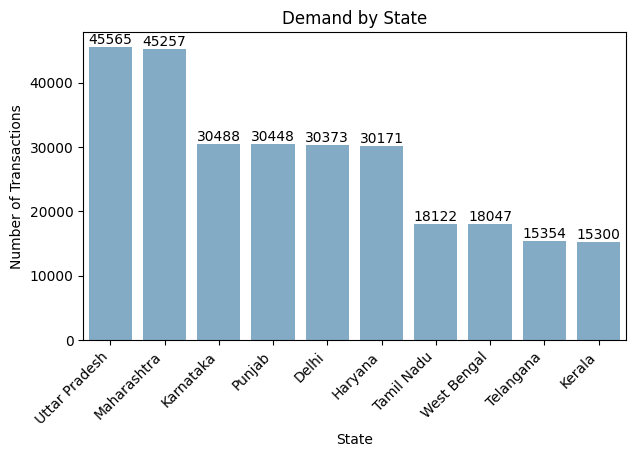

In [ ]:
# Anlyzing demand by state

demand_by_state = df['state'].value_counts().head(10)

# visualizattion of demand by state

plt.figure(figsize=(7, 4)) # defining figure size
ax = sns.barplot(x=demand_by_state.index, y=demand_by_state.values, alpha=0.6) # plotting bargraph using seaborn
ax.bar_label(ax.containers[0]) # giving data labels to the bar

plt.title('Demand by State') # giving title to the graph
plt.xlabel('State') # giving label to x-axis
plt.ylabel('Number of Transactions') # giving label to y-axis

plt.xticks(rotation=45, ha='right') # rotating x-axis labels for better readability
plt.show()

**Observation:**
* Uttar pradesh, Maharashtra, Karnataka, Punjab, Delhi and Haryana are the states where the demand for pre owned vehicles is too high as compared to other states and UTs.

**Recommendations:**
*  Prioritize stocking a larger inventory of popular pre-owned vehicles in Uttar Pradesh, Maharashtra, Karnataka, Punjab, Delhi, and Haryana.
* Set up additional sales hubs in these states to enhance customer access.
* For states with low demand launch targeted marketing campaign (e.g., SUVs in Punjab or compact cars etc).


###**Hypothesis 2: Certain 'manufacturer' and 'model' are high in demand than others.**

In [ ]:
# finding top 10 manufacturer and model.

demand_manufacturer_and_model  = df.groupby(['manufacturer', 'model'])['id'].count().sort_values(ascending=False).head(10) # counting number of transactions
print("\033[1m Top 10 high demand manufacturer and model: \033[0m") # printing the result
demand_manufacturer_and_model

 Top 10 high demand manufacturer and model: 


,,id
manufacturer,model,
ford,f-150,8009
chevrolet,silverado 1500,5140
ram,1500,4069
toyota,camry,3133
chevrolet,silverado,3021
honda,accord,2968
jeep,wrangler,2848
honda,civic,2799
nissan,altima,2779


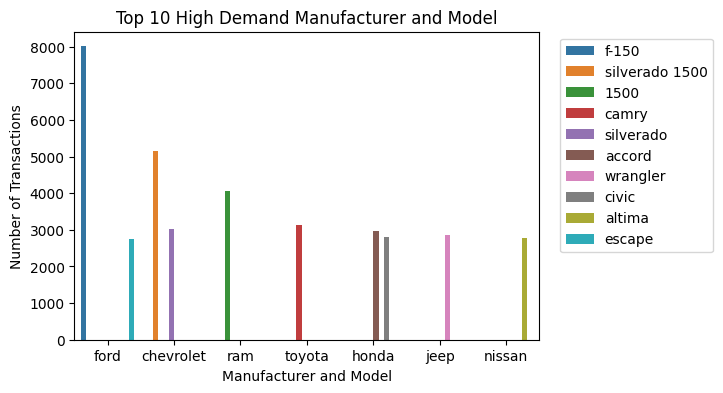

In [ ]:
# visualizing the demand by model and manufacturer

demand_manufacturer_and_model = df.groupby(['manufacturer', 'model'])['id'].count().sort_values(ascending=False).head(10).reset_index()
plt.figure(figsize=(6, 4)) # defining figure size
sns.barplot(data=demand_manufacturer_and_model, x= "manufacturer", y="id", hue="model") # plotting bargraph using seaborn

plt.legend(bbox_to_anchor=(1.03, 1), loc='upper left') # placing legend
plt.title('Top 10 High Demand Manufacturer and Model') # Giving title to the graph

plt.xlabel('Manufacturer and Model') # Giving label to x-axis
plt.ylabel('Number of Transactions') # Giving label to y-axis
plt.show() # showing the graph

**Observation:**
* Top models and manufacturer are Ford(f-150, escape), Chevrolet(Silverado 1500, Silvarado), Ram(1500) etc.

**Recommendations:**
* Seeing the high demand of the Ford(f-150, escape), Chevrolet(Silverado 1500, Silvarado), Ram(1500) etc. Spinny should focus on sustaining sales of these cars by fulfilling demand.
*Also cars with low demand should be promoted by providing extra offers.



###**Hypothesis 3: Power capacity of vehicles influences the demand. People usually prefer moderate power cars.**

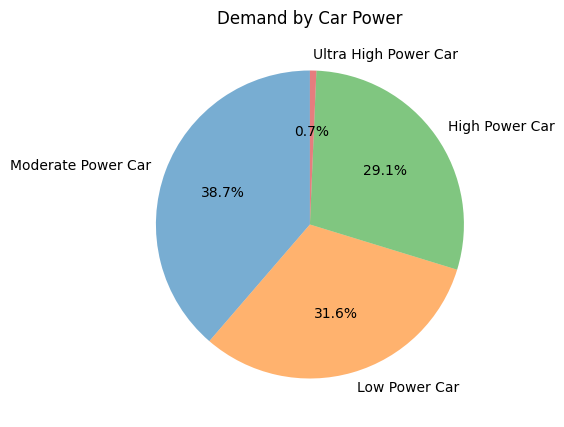

In [ ]:
# Analyzing demand by car power capacity

demand_by_car_power = df[df['car_power_category'] != 'Unknown']['car_power_category'].value_counts()

# visulization of demand by car power
plt.figure(figsize=(5,5)) # defining figure size
plt.pie(demand_by_car_power.values, labels=demand_by_car_power.index, autopct='%1.1f%%', startangle=90, wedgeprops={'alpha': 0.6}) # plotting piechart using matplotlib
plt.title('Demand by Car Power') # Giving title to the pie chart
plt.show()

**Observation:**

* Moderate Power Cars (38.7%) are high in demand followed by Low Power Cars (31.6%), may be because of all time uses and cost effectiveness.
* Ultra High Power Cars have very low demand (0.7%).

**Recommendations:**

* Spinny should assure the supply of Moderate and Low Power Cars as per demand.
* Ulltra high power cars should be promoted among the specific customers.




###**Hypothesis 4: Customers are more likely to buy large size vehicles rather than small vehicles.**

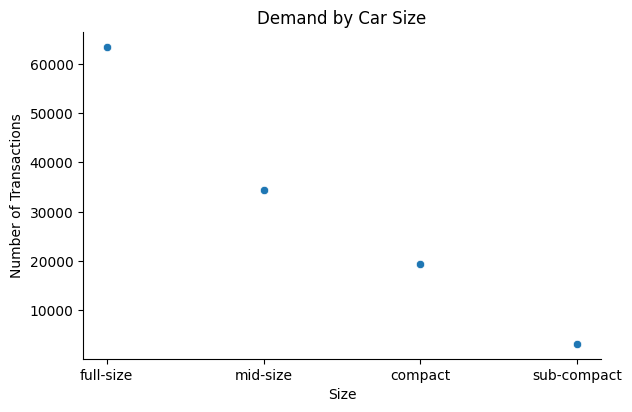

In [ ]:
# calculating demand of the cars by size

demand_by_size = df[df['size'] != 'unknown']['size'].value_counts().rename_axis('size').reset_index(name='demand') # counting number of transaction across different sizes

# visualization of demand by size
sns.relplot(data=demand_by_size, x='size', y='demand', kind="scatter", height=4,  aspect=1.6) # plotting relplot using seaborn
plt.title("Demand by Car Size")  # Updated title for clarity

plt.xlabel("Size") # giving label for x-axis
plt.ylabel("Number of Transactions") # giving label for y-axis

plt.show() # showing the graph

**Observation:**
* Full size and Mid size vehicles are highly in demand whereas sub-cpmpact vehicles are the least preferred by the customers.

**Recommendations:**
* Focus should be on Full and Mid sized vehicles for procurement, advertisement, marketing and supply.
*   Compact and sub-compact vehicles can be promoted among the target customers such as individual users. students etc.





###**Hypothesis 5: Four-wheel drive (4WD) vehicles are more in demand because of suitablility in extreme road conditions.**

###**Drive Categories:**
**FWD:**
The engine's power is sent to the front wheels. FWD vehicles are lighter, have better gas mileage, and are cheaper to build and repair. However, they are front-end heavy, which makes them harder to handle at high speeds or with heavy loads.

**RWD:**
The engine's power is sent to the rear wheels. RWD vehicles have a better weight balance than many FWD vehicles.

**4WD:**
The engine's power is sent to all four wheels, but the system can be toggled on or off. 4WD vehicles are better for extreme snow and ice, off-roading, and towing than AWD vehicles. However, they are often less fuel efficient when 4x4 is activated.

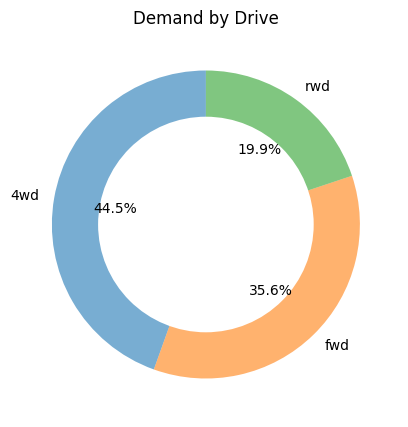

In [ ]:
# Analyzing demand by the drive category

demand_by_drive = df[df['drive'] != 'unknown']['drive'].value_counts() # counting number of transaction across drive category

# visualization of demand by drive
plt.figure(figsize=(5,5)) # defining figure size
plt.pie(demand_by_drive.values, labels=demand_by_drive.index, autopct='%1.1f%%', startangle=90, wedgeprops={'alpha': 0.6}) #plotting the chart

centre_circle = plt.Circle((0,0),0.70,fc='white') # defining inner circle for donut chart
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Demand by Drive') # giving title to the chart
plt.show() # showing the chart

**Observation:**
* 4wd (Four wheel drive) and fwd ( front wheel drive) vehicles are more in demand than rwd (real wheel drive).

**Recommendations:**
* Prioritize listing more 4wd and fwd vehicles on sales platforms.
* Implement competitive pricing strategies for rwd vehicles to improve their marketability.

###**Hypothesis 6: Demand is correlated with fuel cost. People prefer buying vehicle which is cheaper to manage.**

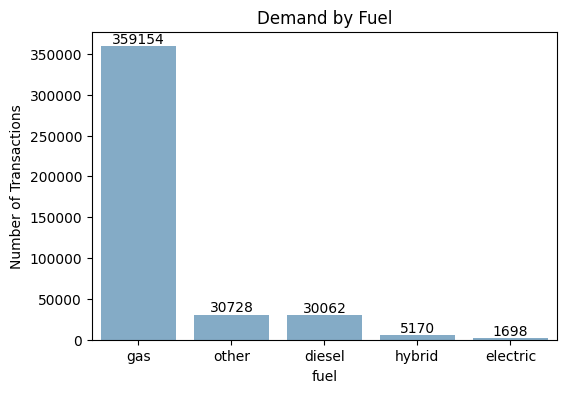

In [ ]:
# Analysing demand by fuel type

demand_by_fuel = df['fuel'].value_counts() # counting number of transactions across fuel types

# visualization of demand by fuel type
plt.figure(figsize=(6, 4)) # defining figure size
ax = sns.barplot(x=demand_by_fuel.index, y=demand_by_fuel.values, alpha=0.6) # plotting bargraph using seaborn
ax.bar_label(ax.containers[0])

plt.title('Demand by Fuel') # giving title to the graph
plt.xlabel('fuel') # giving lable for x-axis
plt.ylabel('Number of Transactions') # giving lables for y-axis

plt.show() # showing the graph

**Observation:**
* Gas based based vehicles are highly in demand because it is cheap to maintain and the elctric vehicles are very less preferred may be beacuse of high cost.

**Recommendations:**
* Increase the inventory of gasoline vehicles to meet higher demand.
* Offer attractive financing options for electric vehicles to make them more accessible.
* Educate customers about available subsidies for electric vehicles.

###**Hypothesis 7: Automatic vehicles are more likely to be preferred by customers hence more in demand than manual.**

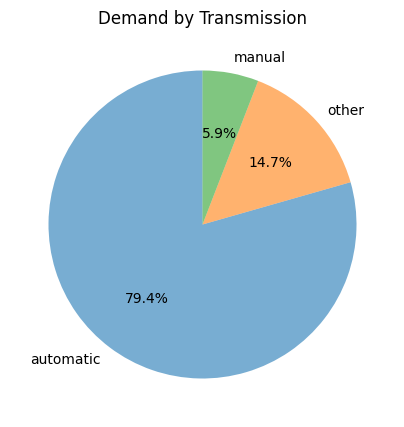

In [ ]:
# analyzing demand by transmission

demand_by_transmission = df['transmission'].value_counts() # counting number of transactions across transmission types

# visualization of demand by transmission
plt.figure(figsize=(5,5)) # defining figure size
plt.pie(demand_by_transmission.values, labels=demand_by_transmission.index, autopct='%1.1f%%', startangle=90,  wedgeprops={'alpha': 0.6}) # plotting piechart using matplotlib
plt.title('Demand by Transmission') # giving title to the graph

plt.show()

**Observation:**
* 79.4% of total transactions are of automatic vehicles which shows the uncomparable demand than manual and other transmission types.

**Recommendations:**
* Align supply of automatic vehicles with respect to demand.
* Focus marketing on the convenience, ease of driving of modern automatic vehicles.
* provide discounted packages for manual transmission vehicles to make them more attractive to buyers.




###**Hypothesis 8: Some specific vehicle type are more in demand than others.**

In [ ]:
# Analyzing demand by car type

car_type_demand = df[df['type'] != 'unknown']['type'].value_counts() # counting number of transactions across car type

fig = px.treemap(names=car_type_demand.index, parents=[''] * len(car_type_demand),values=car_type_demand.values, title='Demand by Car Type') # plotting treemap using plotly
fig.update_traces(root_color="White", textinfo="label+value", opacity = 0.8) # including details to the map
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25), width=700, height=500)  # defining layout of the map

fig.show() # showing the chart

**Observation:**
* Sedan, SUV and Pickup are highly preferred vehicles by customers and bus are the least preferred.

**Recommendations:**
* Ensure adequate supply of Sedan, SUVs, Pickup, coupe etc vehicle types to fasten sales.
* Reduce or limit the inventory of buses and introduce trade-in offers, to make buses more attractive to niche markets.

###**Hypothesis 9: Color of the vehicle is an important attribute to enhance demand. People normally prefer white and black colors.**

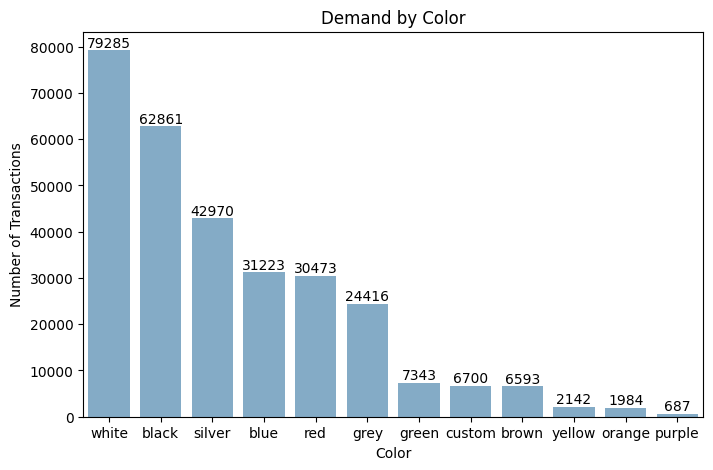

In [ ]:
# Analyzing demand by color

demand_by_color = df[df['paint_color'] != 'unknown']['paint_color'].value_counts() # counting number of transaction across colors

# visualization of demand by color

plt.figure(figsize=(8, 5)) # defining figure size
ax = sns.barplot(x=demand_by_color.index, y=demand_by_color.values, alpha=0.6) # plotting bargraph using seaborn

ax.bar_label(ax.containers[0]) # giving label to the bars
plt.title('Demand by Color') # giving title to the graph

plt.xlabel('Color') # giving label to x-axis
plt.ylabel('Number of Transactions') # giving label to y-axis

plt.show() # showing the graph

**Observation:**
* White, Black, Silver, Blue, and Red color are high in demand whereas Yellow, Orange, Purple are least preferred.

**Recommendations:**
* Increase stock of vehicles in hifg demand colors (white, black, silver, blue, red) to maximize sales.
* Offer discounts, and incentives for vehicles in less preferred colors to clear inventory faster.

##**Revenue Analysis:**

###**Hypothesis 10: Some specific models leads to higher revenue generation.**

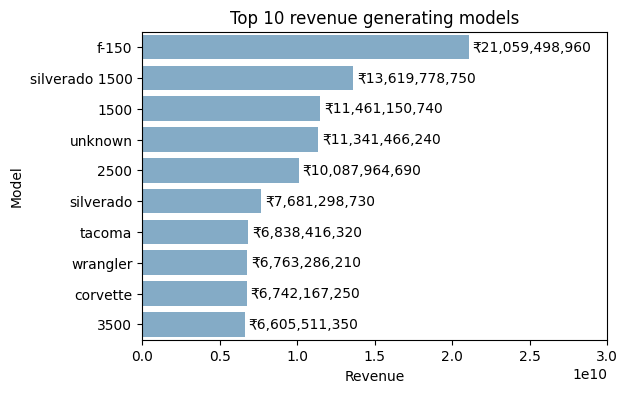

In [ ]:
# Analyzing revenue by model

top_10_model = df.groupby('model')['price'].sum().round().sort_values(ascending=False).head(10) # finding top 10 highest revenue generating models

# vizualization of revenue by model

plt.figure(figsize=(6, 4)) # defining figure size
ax = sns.barplot(x=top_10_model.values, y=top_10_model.index, alpha=0.6) # plotting bargraph using seaborn
ax.bar_label(ax.containers[0], labels=[f'₹{x:,.0f}' for x in top_10_model.values], padding=3) # giving label to the bars

plt.xlim(0, 30000000000) # setting x-axis limit
plt.title('Top 10 revenue generating models') # giving title to the graph

plt.ylabel('Model') # giving label to x-axis
plt.xlabel('Revenue') # giving label to y-axis

plt.show() # showing the bargraph

**Observation:**
* F-150, Silverado 1500, 2500, tacoma, wrangler etc are the cars which are generating high revenue.

**Recommendations:**
* Stock of F-150, Silverado 1500, 2500, tacoma, wrangler etc cars should be enough to sell at high numbers.
* Marketing for the same should be focused to retain and increase the sales.
* Target relevant customer segments such as businesses, outdoor enthusiasts, and families.



###**Hypothesis 11: Vehicles in certain color categories (white, black) have higher share in revenue.**

In [ ]:
# Analyzing revenue by color

revenue_by_color = df[df['paint_color'] != 'unknown'].groupby('paint_color')['price'].sum().round().sort_values(ascending=False)

# visualization of revenue by color

fig = px.treemap(names=revenue_by_color.index, parents=[''] * len(revenue_by_color),values=revenue_by_color.values, title='Revenue by Color')
fig.update_traces(root_color="White", textinfo="label+value", texttemplate="%{label}<br>₹%{value:,.0f}", opacity = 0.8)
fig.update_layout(margin=dict(t=50, l=25, r=25, b=25), width=700, height=500)
fig.show()

**Observation:**
* White, Black, Sikver, Blue and Red color are high in demand and also generate high revenue.
* Purple, Orange, Orange etc colors are very low demand and revenue share.

**Recommendations:**
* Sourcing of the vehicles in White, Black, Sikver, Blue and Red color should be at large scale to maintain and increase revenue.
* Least revenue generating color vehicle should be sold at offer prices to clear the stock.
*Marketing for low revenue generating vehicles should focus on aother feature, engine, status, type etc.

###**Hypothesis 12: Age of the vehicle influences the revenue.**

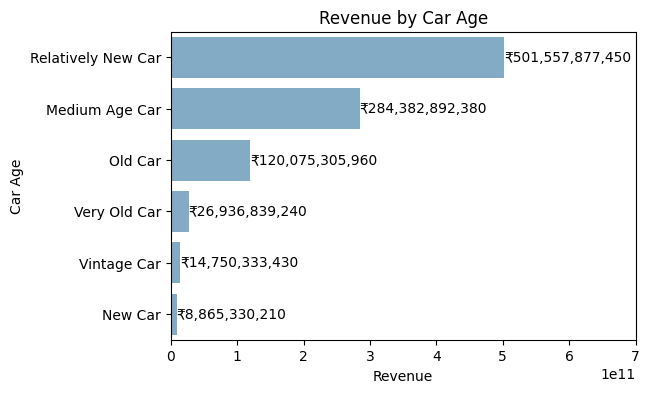

In [ ]:
# Analyzing revenue by care age

revenue_by_car_age = df.groupby('car_age')['price'].sum().round().sort_values(ascending=False) # counting total revenue across car age

# visualization of revenue by car age

plt.figure(figsize=(6, 4)) # defining figure size
ax = sns.barplot(y=revenue_by_car_age.index, x=revenue_by_car_age.values, alpha=0.6) # plotting bar graph using seaborn
plt.xlim(0, 700000000000) # setting x-axis limit

ax.bar_label(ax.containers[0], labels=[f'₹{x:,.0f}' for x in revenue_by_car_age.values]) # adding data labels to the bars
plt.title('Revenue by Car Age') # giving title to the graph

plt.xlabel('Revenue') # giving label to x-axis
plt.ylabel('Car Age') #giving label to y-axis

plt.show()

**Observation:**
* Relatively new, Medium age, and Old age vehicles are highly important for revenue purpose.
* New and vintage vehicles contribute very less in revenue.

**Recommendations:**
* Relatively new  (2016-2020) and medium age (2011-2015) vehicles should be in large number in inventory.
* Introduce tailored financing solutions for old, very old and vintage vehicles with lower monthly payments to attract budget-conscious buyers.


###**Hypothesis 13: Sates with high demand have high revenue contribution.**

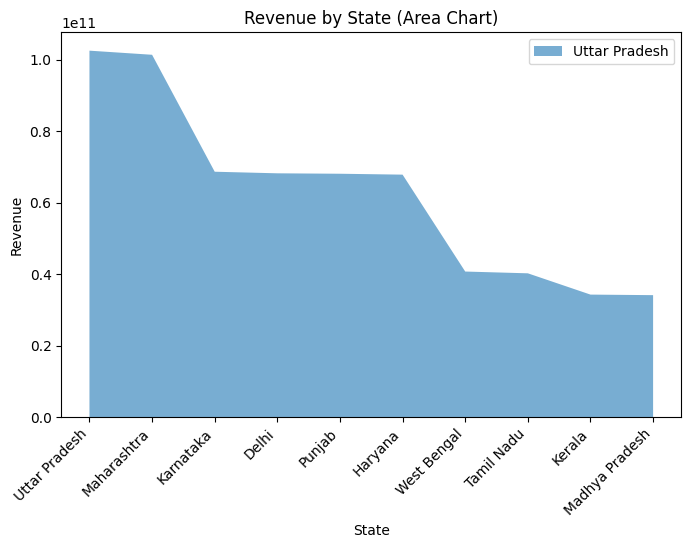

In [ ]:
# Analyzing revenue by state

revenue_by_state = df.groupby('state')['price'].sum().round().sort_values(ascending = False).head(10).rename_axis('state').reset_index(name='revenue') # calculating revenue by state

# Visualization of revenue by sate

plt.figure(figsize=(8, 5)) # defining figure size
plt.stackplot(revenue_by_state['state'], revenue_by_state['revenue'], labels=revenue_by_state['state'], alpha=0.6) # plotting stackplot using matplotlib

plt.title("Revenue by State (Area Chart)") # giving title to the chart
plt.xlabel("State") # giving label to x-axis
plt.ylabel("Revenue") # giving label to y-axis

plt.legend(loc='upper right')  # Placing the legend
plt.xticks(rotation=45, ha='right') # rotating x-axis labels for better readability

plt.show() # showing the chart

**Observation:**
* Uttar pradesh, Maharashtra, Karnataka, delhi and Punjab have high demand and high revenue also. May be because of large population living in thses states.

**Recommendations:**
* Ensure a greater stock of popular models and high-revenue vehicles (such as F-150, Tacoma, Wrangler, etc.) is available in Uttar Pradesh, Maharashtra, Karnataka, Delhi, and Punjab to meet the demand.
* Offer festive season sales and state-specific promotions, especially during Diwali, Ganesh Chaturthi (Maharashtra), and Baisakhi (Punjab).
* Develop logistics and distribution centers near major urban hubs in Delhi NCR, Mumbai, Bangalore, and Lucknow to reduce delivery times.


###**Hypothesis 14: Certain type of vehicles generating more revenue than other type of vehicles.**

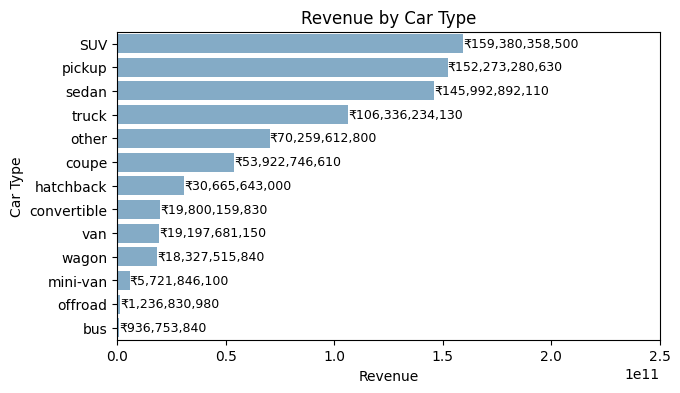

In [ ]:
# Analyzing revenue by car type

revenue_by_car_type = df[df['type'] != 'unknown'].groupby('type')['price'].sum().sort_values(ascending=False) # calculating total revenue across car types

# visualization of the revenue by car type

plt.figure(figsize=(7, 4)) # defining figure size
ax = sns.barplot(y=revenue_by_car_type.index, x=revenue_by_car_type.values, alpha=0.6) # plotting bar graph using seaborn

plt.xlim(0, 250000000000) # setting limit for the x-axis
ax.bar_label(ax.containers[0], labels=[f'₹{x:,.0f}' for x in revenue_by_car_type.values], fontsize=9) # adding data label to the bars

plt.title('Revenue by Car Type') # giving title to the graph
plt.xlabel('Revenue')  # giving label to x-axis
plt.ylabel('Car Type') # giving label to y-axis

plt.show() # showing the graph

**Observation:**
* SUV, Pickup, Sedan, Truck etc vehicles contribute maximum in revenue. Whereas
Bus, Offroad, minivan comtribute least.

**Recommendations:**
* Emphasize Utility and Versatility in Promotions for SUVs and Pickups.
* Offer customized deals for corporate clients, logistics companies, and construction firms needing fleet vehicles like pickups and trucks.

###**Hypothesis 15: Power category of vehicle have impact on revenue.**

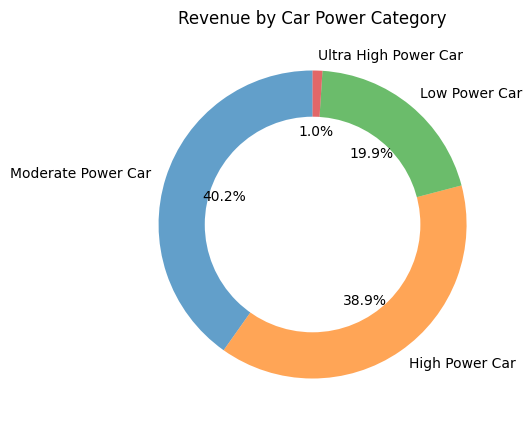

In [ ]:
# analyzing revenue by car power category

# calculating revenue by power category
revenue_by_car_power_category = df[df['car_power_category'] != 'Unknown'].groupby(['car_power_category'])['price'].sum().sort_values(ascending=False)

# visualization of revenue by car power category

plt.figure(figsize=(5, 5)) # defining figure size
plt.pie(revenue_by_car_power_category.values, labels=revenue_by_car_power_category.index, autopct='%1.1f%%',
        startangle=90, wedgeprops={'alpha': 0.7}) # plotting  chart using  matplotlib.pyplot

centre_circle = plt.Circle((0,0),0.70,fc='white') # defining inner circle for donut chart
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Revenue by Car Power Category') # adding title to the chart
plt.show() # showing the chart

**Observation:**
* Moderate power vehicles (40.2%) have the largest share in revenue followed by High power vehicles (38.9%). Whereas Ultra high power vehicle have least revenue. May be because of the day to day uses and cost.

**Recommendations:**
* Include models across multiple segments (SUVs, sedans, and pickups) with moderate power output to cater to the broadest audience.
* Highlight the fuel efficiency, reliability, and low maintenance costs of moderate-power cars in marketing campaigns to attract to cost-conscious buyers.
* Organize performance test drives, racing events, or car shows to attract attention and promote ultra-high-power models to a specialized market segment.




###**Hypothesis 16: Luxury cars manufacturer are more likely to generate high revenue per unit.**

In [ ]:
# Analyzing revenue per manufacturer

revenue_per_manufacturer = df.groupby('manufacturer').agg(total_revenue=('price', 'sum'), units_sold=('manufacturer', 'count'),
                                                          avg_revenue_per_unit=('price', 'mean')).reset_index()
display("Revenue Per Manufacturer:", revenue_per_manufacturer.sort_values(by='avg_revenue_per_unit', ascending=False).head())


'Revenue Per Manufacturer:'

,manufacturer,total_revenue,units_sold,avg_revenue_per_unit
11,ferrari,1261836050.00,95,15772950.62
2,aston-martin,164873950.00,24,7851140.48
38,tesla,4275460330.00,868,5071720.44
33,porsche,5677993830.00,1384,4394732.07
34,ram,63140357440.00,18342,3852840.95


**Observation:**
* Ferrari, Aston-Martin, Tesla, Porche, Ram are some luxury vehicle manufacturer which have huge revenue per unit.

**Recommendations:**
* Allocate resources to regions or cities where luxury vehicles are in greater demand (e.g., metro cities like Delhi, Mumbai, Bangalore).
* Provide a personalized buying experience, including at-home test drives, exclusive previews, and dedicated sales advisors for affluent clients.
* Market Tesla's features such as Autopilot, long-range battery performance etc alongside luxury.


###**Hypothesis 17: Fuel type influences the revenue. Gasoline being the most sold fuel type have the highest share in revenue.**

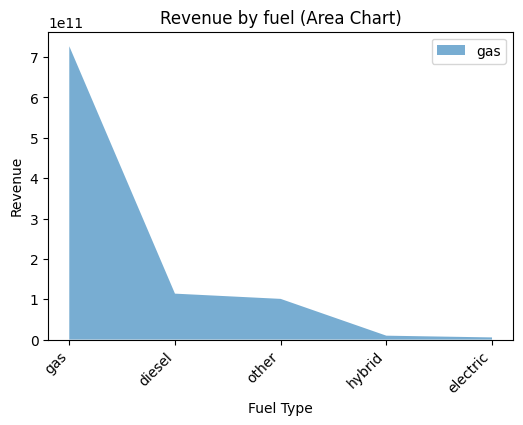

In [ ]:
# Analyzing revenue by fuel type

revenue_by_fuel = df.groupby(['fuel'])['price'].sum().sort_values(ascending=False).rename_axis('fuel').reset_index(name='revenue') # calculating revenue across fuel types

# visualization of revenue by fuel types

plt.figure(figsize=(6, 4)) # defining figure size
plt.stackplot(revenue_by_fuel['fuel'], revenue_by_fuel['revenue'], labels=revenue_by_fuel['fuel'], alpha=0.6) # plotting stackplot using matplotlib

plt.title("Revenue by fuel (Area Chart)") # giving title to the graph
plt.xlabel("Fuel Type") # giving label to x-axis
plt.ylabel("Revenue") # giving label to y-axis

plt.legend(loc='upper right')  # Placing the legend
plt.xticks(rotation=45, ha='right')  # Rotating x-axis for brtter readability

plt.show() #showing the chart

**Observation:**
* Gasoline based vehicles are earnig high revenue followed by diesel. Electric vehicle contributing very low revenue may be because of cost of purchase and maintainace.

**Recommendations:**
* Prioritize maintaining a strong inventory of gasoline-powered SUVs, sedans, and pickups since they generate the most revenue.
* Partner with charging network providers to offer free or subsidized charging plans for Electric vehicle buyers.
* Use sustainability-focused marketing campaigns to appeal to buyers prioritizing environmental impact.



###**Hypothesis 18: Revenue changes with respect to time.**

Here we are not having purchase date in the dataset so we are using posting date as a proxy to see revenue trend over time.

In [ ]:
# Analyzing revenue trend over time

revenue_trend_over_time = df.groupby('posting_date_new')['price'].sum().reset_index() # calculating total revenue across posting date
print((revenue_trend_over_time).head(10)) # printing first 10 date with revenue

  posting_date_new          price
0       2021-04-04  9994827020.00
1       2021-04-05 19379379050.00
2       2021-04-06 16488098170.00
3       2021-04-07 18623730270.00
4       2021-04-08 21094385550.00
5       2021-04-09 21882872000.00
6       2021-04-10 18196585500.00
7       2021-04-11 12903298880.00
8       2021-04-12 20661286820.00
9       2021-04-13 19420957260.00


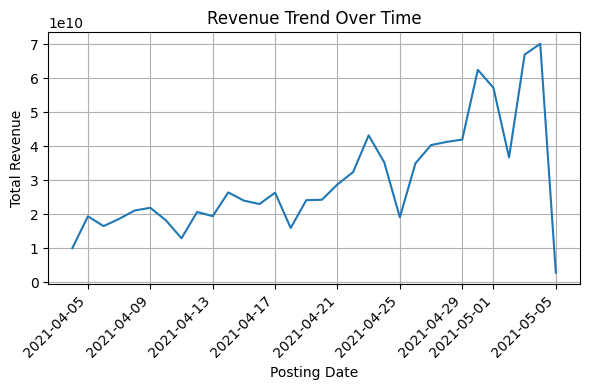

In [ ]:
# visualization of revenue trend over time

plt.figure(figsize=(6, 4)) # defining figure size
plt.plot(revenue_trend_over_time['posting_date_new'], revenue_trend_over_time['price']) # plotting line graph using matplotlib.pyplot

plt.title('Revenue Trend Over Time') # giving title to the graph
plt.xlabel('Posting Date') # giving label to x-axis
plt.ylabel('Total Revenue') # giving label to y-axis

plt.grid(True)  # Adding grid to chart
plt.xticks(rotation=45, ha='right')  # rotating x-axis for better readability
plt.tight_layout()  # Adjusting layout to prevent labels from overlapping

plt.show() # showing the graph

In [ ]:
print("Start date:", df['posting_date_new'].min())
print("End date:", df['posting_date_new'].max())

Start date: 2021-04-04
End date: 2021-05-05


Since the posting date are for only 1 month (04/04/2021 to 05/05/2021) no specific obseravtion can be made from this analysis. From the analysis it is seen that revenue is increasing with time. But since the date is proxy and for very less days, we can not consider this analysis.

##**Price Analysis:**

###**Hypothesis 19: Price of the vehicle is correlated to odometer reading. Vehicle with high odometer reading has low price.**

In [ ]:
# Analyzing correlation between price and odometer

correlation = df[['price', 'odometer']].corr().iloc[0, 1]  # Calculate correlation between 'price' and 'odometer'
print(f"\033[1m Correlation between Price and Odometer: {correlation:.2f} \033[0m") # printing the correlation value

 Correlation between Price and Odometer: -0.39 


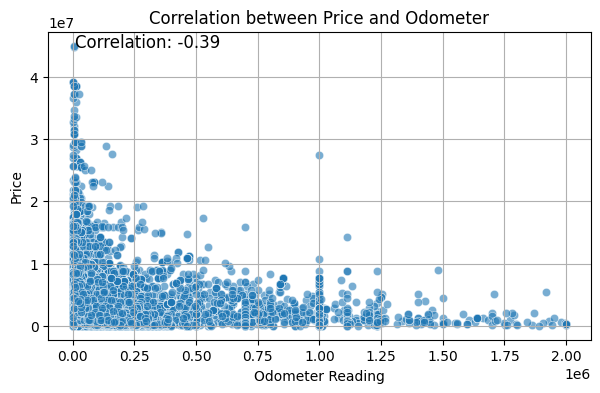

In [ ]:
# visualization of correlation analysis

plt.figure(figsize=(7, 4))  # defining figure size
sns.scatterplot(x='odometer', y='price', data=df, alpha=0.6) # plotting scatterplot using seaborn

plt.title('Correlation between Price and Odometer') # giving title to the graph
plt.xlabel('Odometer Reading') # giving label to x-axis
plt.ylabel('Price') # giving label to y-axis

plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes, fontsize=12) # adding correlation value to the graph
plt.grid(True) # adding grid to the graph

plt.show() # showing the graph


**Observation:**
* There is a moderate negative correlation between price and odometer reading. This means that as the odometer reading increases, the price of the vehicle decreases.
* Vehicles with lower odometer readings shows a wide range of prices, indicating variation based on vehicle attributes like manufacture, model etc.
* Vehicles with higher odometer readings tend to have lower prices, with fewer exceptions.

**Recommendations:**
* Focus on sourcing vehicles with lower odometer readings, to maintain good revenue.
* Implement dynamic pricing model for vehicles with low odometer readings.
* Offer extended warranties on vehicles with high odometer reading to build costomer trust.

###**Hypothesis 20: Price of the vehicles vary by models and within the models of the vehicle.**

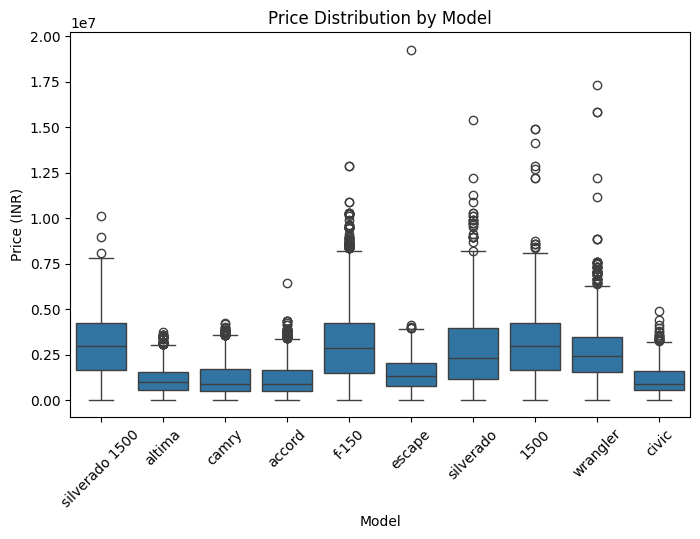

In [ ]:
# Analyzing price distribution by top 10 models

top_models = df[df['model'] != 'unknown']['model'].value_counts().head(10).index # finding top 10 models with maximum transactions
subset_data = df[df['model'].isin(top_models)] # creating folterered data of top 10 model

# visualization of price distribution by top 10 models

plt.figure(figsize=(8, 5)) # defining figure size
sns.boxplot(x='model', y='price', data=subset_data) # plotting boxplot using seaborn

plt.xticks(rotation=45) # rotating x axis for better readability
plt.title('Price Distribution by Model') # adding title to the chart

plt.xlabel('Model') # giving label to x-axis
plt.ylabel('Price (INR)') # giving label to y-axis

plt.show() # showing the chart



**Observation:**
* Silverado 2500 has the highest median price and broader distribution, indicating it may be a premium or heavy-duty vehicle.
* Altima, Camry, and Civic have lower median prices, suggesting they are likely economy or mid-range vehicles.
* Models like Tacoma and Accord have narrower interquartile ranges (IQR), indicating relatively stable pricing.

**Recommendations:**
* Premium Models (e.g., Silverado 2500, F-150): Use the 75th percentile price as a baseline to reflect their value to premium buyers.
* Economy Models (e.g., Civic, Altima, Camry):Set prices around the median or lower quartile to attract budget-conscious buyers.
* Stable Pricing Models (e.g., Tacoma, Accord): Maintain consistent pricing close to the median, as these models have less variability and appeal to buyers valuing stability.
* Adjust pricing to remain competitive in the market by comparing with similar vehicles.

###**Hypothesis 21: Price is correlated with the manufacturing year of the vehicle. New vehicle have high prices whereas old have low prices.**

In [ ]:
# Analyzing correlation between price and year

price_year_correlation = df[['price', 'year']].corr().iloc[0, 1]
print(f"\033[1m Correlation between Price and Year: {price_year_correlation:.2f} \033[0m")

 Correlation between Price and Year: 0.32 


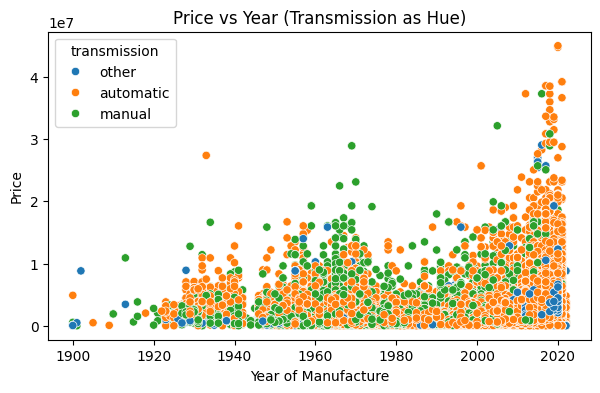

In [ ]:
# visualization of price-year correlation with transmission as hue

plt.figure(figsize=(7, 4)) # defining figure size
sns.scatterplot(x='year', y='price', hue='transmission', data=df) # plotting scatterplot using seaborn

plt.title('Price vs Year (Transmission as Hue)') # adding transmission as hue
plt.xlabel('Year of Manufacture') # giving label to x-axis
plt.ylabel('Price') # giving label to y-axis

plt.show()

**Observation**
* Price and year of vehicle manufacture have positive correlation (0.32 ). As the year of manufacturing increase prices also increase.
*Maximum distribution and incerase of price is for automatic vehicles.

**Recommendations**
* Highlight automatic transmission benefits such as ease of driving, comfort in traffic, and higher resale value in marketing campaigns to keep demand high.
* Offer model clearance sales for older vehicles to reduce inventory faster.

###**Hypothesis 22: Price distribution of vehicles is corrrelated with car age, old vehicles have low price distribution whereas new vehicle have wide price distribution.**

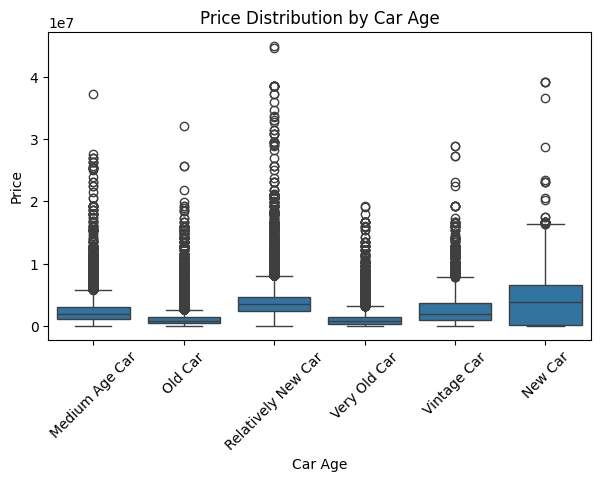

In [ ]:
# Analyzing price distribution by car age

dist_by_car_age = df['car_age'].value_counts().sort_values(ascending=False) # counting number of transactions across car age

# visualization of price distribution by car age

plt.figure(figsize=(7, 4)) # defining figure size
sns.boxplot(x='car_age', y='price', data=df) # plotting boxplot using seaborn

plt.xticks(rotation=45) # rotating x-axis labels for better readability
plt.title('Price Distribution by Car Age') # giving title to the graph

plt.xlabel('Car Age') # giving label to x-axis
plt.ylabel('Price') # giving label to y-axis

plt.show() # showing the graph

**Observation:**
* Relatively new car (2016-2020) and medium age car (2011-2015) have largest price distribution.
* Old, very old, new and vintage cars have low price distibution.

**Recommendations:**
* Optimize the prices of Relatively new, medium age cars with respect to the demand.
* Review and correct the prices of old, very old and vintage cars.


##**Price Optimization**

To enhance the revenue price prediction and price optimization of each car is very important. Based on the feature like year of manufacture and odometer reading, we can potimize the prices of cars. We are using statistical methods like IQR for price optimization and linear regression for price prediction.

In [ ]:
# Calculating descriptive statistics for each manufacturer and model
stats = df.groupby(['manufacturer', 'model'])['price'].agg(['mean', 'median', 'std', 'min', 'max', 'count'])
q1 = df.groupby(['manufacturer', 'model'])['price'].quantile(0.25)
q3 = df.groupby(['manufacturer', 'model'])['price'].quantile(0.75)
iqr = q3 - q1

# Merging statistics into the DataFrame
df = df.merge(stats, on=['manufacturer', 'model'], how='left', suffixes=('', '_stats'))
df = df.merge(q1.rename('q1'), on=['manufacturer', 'model'], how='left')
df = df.merge(q3.rename('q3'), on=['manufacturer', 'model'], how='left')
df['iqr'] = df['q3'] - df['q1']

# Price prediction using linear regression
features = ['odometer', 'year']
df = df.dropna(subset=features + ['price'])
X = df[features]
y = df['price']
model = LinearRegression()
model.fit(X, y)
df['predicted_price'] = model.predict(X)

# price optimization using stats
df['optimized_price'] = df.apply( lambda row: np.clip(row['median'] + (row['std'] * 0.5), row['q1'], row['q3']), axis=1)
pd.options.mode.copy_on_write = True

In [ ]:
# verifying predicted prices

print("Predicted prices:\n")
df['predicted_price'].head()

Predicted prices:



,predicted_price
0,2876406.70
1,2581750.93
2,3468898.78
3,3151982.25
4,2268467.47


In [ ]:
# verifying Optimized prices

print("Optimized prices:\n")
df['optimized_price'].head()

Optimized prices:



,optimized_price
0,4365310.00
1,3786665.67
2,5084440.00
3,4645949.52
4,3297597.08


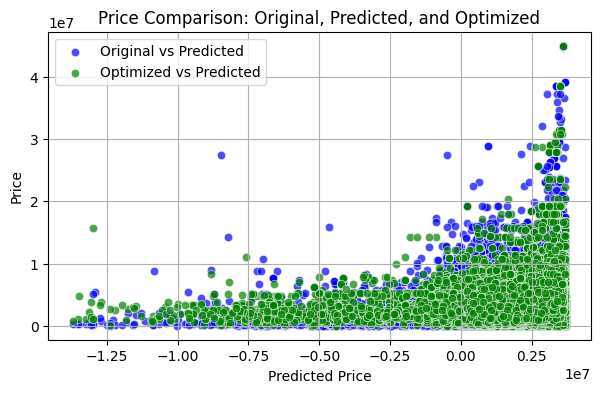

In [ ]:
# Visualization of comparing original, predicted, and optimized prices
plt.figure(figsize=(7, 4))
sns.scatterplot(data=df, x='predicted_price', y='price', label='Original vs Predicted', alpha=0.7, color='blue')
sns.scatterplot(data=df, x='predicted_price', y='optimized_price', label='Optimized vs Predicted', alpha=0.7, color='green')

# Adding plot details
plt.title("Price Comparison: Original, Predicted, and Optimized")
plt.xlabel("Predicted Price")
plt.ylabel("Price")
plt.legend(loc="best")
plt.grid(True)
plt.show()


**Observation:**
* There is a spread in the blue points, especially for higher prices, which suggests that the original prices deviate more significantly from the predicted values as the predicted price increases.
* The green points are more tightly aligned with the predicted values, indicating that the optimization process adjusted the prices to be closer to the predicted range.
* The green points appear to have less scatter around the predicted values than the blue points. This suggests that the optimization has reduced the variance and brought prices closer to a statistically reasonable range.

**Recommendations:**
* Since the scatter plot shows that original prices deviate significantly from the optimized prices, standardizing pricing based on statistical optimization can reduce discrepancies.
* Use the optimized prices as a baseline to ensure uniform pricing for cars within similar categories or features. Develop a pricing strategy aligned with optimized prices.


In [ ]:
# Dropping intermediate predicted_price column

df = df.drop(columns=['mean', 'median', 'std', 'min', 'max', 'count', 'q1', 'q3', 'iqr'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391950 entries, 0 to 426811
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   id                  391950 non-null  int64              
 1   price               391950 non-null  float64            
 2   year                391950 non-null  Int64              
 3   manufacturer        391950 non-null  object             
 4   model               391950 non-null  object             
 5   condition           391950 non-null  object             
 6   cylinders           391950 non-null  object             
 7   fuel                391950 non-null  object             
 8   odometer            391950 non-null  float64            
 9   title_status        391950 non-null  object             
 10  transmission        391950 non-null  object             
 11  drive               391950 non-null  object             
 12  size                3

In [ ]:
df.head()

,id,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,...,state,posting_date,latitude,longitude,cylinder_new,car_power_category,car_age,posting_date_new,predicted_price,optimized_price
0,7316814884,4313900.00,2014,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.00,clean,...,Kerala,2021-05-04 17:31:18+00:00,9.81,76.84,8,High Power Car,Medium Age Car,2021-05-04,2876406.70,4365310.00
1,7316814758,2901280.00,2010,chevrolet,silverado 1500,good,8 cylinders,gas,71229.00,clean,...,Uttar Pradesh,2021-05-04 17:31:08+00:00,29.24,83.78,8,High Power Car,Old Car,2021-05-04,2581750.93,3786665.67
2,7316814989,5084440.00,2020,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.00,clean,...,Delhi,2021-05-04 17:31:25+00:00,28.81,76.89,8,High Power Car,Relatively New Car,2021-05-04,3468898.78,5084440.00
3,7316743432,3980090.00,2017,toyota,tundra double cab sr,good,8 cylinders,gas,41124.00,clean,...,Odisha,2021-05-04 15:41:31+00:00,19.29,85.27,8,High Power Car,Relatively New Car,2021-05-04,3151982.25,4645949.52
4,7316356412,1926290.00,2013,ford,f-150 xlt,excellent,6 cylinders,gas,128000.00,clean,...,Tripura,2021-05-03 19:02:03+00:00,23.49,91.12,6,Moderate Power Car,Medium Age Car,2021-05-03,2268467.47,3297597.08


##**5. Key observations and Recommendations:**

###**Key Observations:**

**1. Top-Performing Models and Manufacturers:**
* High-revenue models include Ford (F-150, Escape), Chevrolet (Silverado 1500, Silverado), and Ram (1500).
* Silverado 2500 has the highest median price and broader distribution, indicating it may be a premium or heavy-duty vehicle.
* Altima, Camry, and Civic have lower median prices, suggesting they are likely economy or mid-range vehicles.
* Models like Tacoma and Accord have narrower interquartile ranges (IQR), indicating relatively stable pricing.

**2. Vehicle Power Demand**
* Moderate-power vehicles dominate sales and revenue, followed by high-power vehiclees, while ultra-high-power vehicles have the least demand.

**3. Vehicle Size and Body Type:**
* Full-size and mid-size vehicle are highly demanded, while compact and sub-compact vehicle have lower preference.
* SUVs, pickups, sedans, and trucks contribute the most to revenue, while buses, minivans, and off-road vehicles contribute the least.

**4. Drive Type Preference:**
* Four-wheel-drive (4WD) and front-wheel-drive (FWD) vehicles are preferred over rear-wheel-drive (RWD) cars.

**4. Fuel Type Preferences:**
* Gasoline-based vehicles lead in revenue, followed by diesel, while electric vehicles have minimal contribution due to high costs.

**5. Transmission Type:**
* Automatic vehicle dominate transactions, accounting for 79.4% of sales, indicating high demand compared to manual vehicle.

**6. Regional Demand**
* Uttar Pradesh, Maharashtra, Karnataka, Delhi, and Punjab have the highest demand and revenue generation, likely driven by population size.

**7. Color Preferences:**
* White, black, silver, blue, and red cars are highly preferred and generate higher revenue, while yellow, orange, and purple cars have the least demand and revenue share.

**8. Vehicle Condition:**
* Vehicles in good and excellent condition have the largest share in sales, while lower-condition vehicles are less preferred.

**9. Odometer Reading Impact on Price:**
* A negative correlation exists between price and odometer reading, with vehicles having lower odometer readings showing a broader price range.

**10. Title Status:**
Vehicles with a "clean" title have the widest price distribution and highest demand, while rebuilt, lien, salvage, and other titles have lower prices and demand.

**11. Year of Manufacture:**
* Prices increase with more recent manufacturing years. Maximum price distribution is seen in automatic vehicles.

**12. Vehicle Age and Revenue:**
* Relatively new (2016-2020), medium-age (2011-2015), and old vehicles generate significant revenue, while new, very old, and vintage cars contribute minimally.

**13. Luxury Vehicle Manufacturers:**
* Brands like Ferrari, Aston Martin, Tesla, Porsche, and Ram generate high revenue per unit.

**14. Price Optimization:**
* The original prices deviate more significantly from the predicted values as the predicted price increases.
* The optimization process adjusted the prices to be closer to the predicted range.
* The optimization has reduced the variance and brought prices closer to a statistically reasonable range.

###**Recommendations:** Solution to Business Objective

**1. Optimize Inventory and Supply Chain:**

* Stock more top-performing models (e.g., Ford F-150, Chevrolet Silverado) and high-demand body types like SUVs, pickups, and sedans.
* Prioritize maintaining inventory of moderate and high-power vehicles to match demand while promoting ultra-high-power vehicles for niche markets.
* Increase procurement of gasoline vehicles, followed by diesel, and improve accessibility for electric vehicles with better financing and charging incentives.

**2. Enhance Regional Strategy:**

* Establish sales hubs and logistics centers in states like Uttar Pradesh, Maharashtra, Karnataka, Punjab, and Delhi to meet higher demand efficiently.
* Launch state-specific promotions and festive season campaigns tailored to regional preferences.


**3. Leverage Transmission and Drive Type Preferences:**

* Align inventory with the higher demand for automatic vehicles.
* Offer competitive pricing and promotional packages for manual transmission and rear-wheel-drive vehicles.

**4. Color and Condition-Based Marketing:**

* Increase inventory of popular colors (white, black, silver, blue, red) while offering discounts on less-preferred colors (yellow, orange, purple).
* Maintain competitive pricing for vehicles in good and excellent condition and focus on refurbishing lower-condition cars to enhance their marketability.

**5. Dynamic Pricing and Financing Models:**
* Premium Models (e.g., Silverado 2500, F-150): Use the 75th percentile price as a baseline to reflect their value to premium buyers.
* Economy Models (e.g., Civic, Altima, Camry):Set prices around the median or lower quartile to attract budget-conscious buyers.
* Stable Pricing Models (e.g., Tacoma, Accord): Maintain consistent pricing close to the median, as these models have less variability and appeal to buyers valuing stability.
* Adjust pricing to remain competitive in the market by comparing with similar vehicles.
* Implement dynamic pricing for vehicles with lower odometer readings to maximize revenue.
* Offer extended warranties and tailored financing for vehicles with higher odometer readings and for older, very old, and vintage vehicles to attract budget-conscious buyers.

**6. Marketing and Promotions:**

* Promote automatic vehicles with a focus on convenience and resale value.
* Emphasize the benefits of moderate-power vehicles, including reliability and fuel efficiency, in marketing campaigns.
* Organize events like performance test drives to boost ultra-high-power vehicle sales.
* Use sustainability-focused campaigns to drive interest in electric vehicles and highlight cost-saving benefits.

**7. Focus on Title Status:**

* Prioritize acquiring vehicles with a "clean" title and improve the marketability of lower title status cars by investing in necessary repairs and certifications.

**8. Luxury Market Targeting:**

* Develop personalized buying experiences for high-end brands like Ferrari, Tesla, and Porsche to attract affluent buyers in metro cities.
* Highlight unique features (e.g., Tesla’s Autopilot, Porsche’s performance) in luxury marketing.

**9. Predictive and Optimized pricing:**
* Since original prices deviate significantly from the optimized prices, standardizing pricing based on statistical optimization can reduce discrepancies.
* Use the optimized prices as a baseline to ensure uniform pricing for cars within similar categories or features. Develop a pricing strategy aligned with optimized prices.

In [ ]:
# #Downloading the updated data.

# df.to_csv("df.csv", index=False)
# from google.colab import files
# files.download('df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##**Thank You**